<h1>Import Dependencies</h1>

In [1]:
!pip install tensorflow==2.10.0 tensorflow-gpu==2.10.0 matplotlib numpy

  Using cached https://files.pythonhosted.org/packages/ce/33/c5d607ccd001a1e3e0e535187ebfb01f1f8bed7f801ae1a6a3b1adad1986/tensorflow-2.10.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/35/7c/41ac89e83dff2c9655b0661e9cbde931a5d1b2a190b1b973334941fb8da6/tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/69/65/0d47953afa0ad569d12de5f65d964321c208492064c38fe3b0b9744f8d44/numpy-1.24.4-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/67/e1/434566ffce04448192369c1a282931cf4ae593e91907558eaecd2e9f2801/termcolor-2.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b5/f4/6047304e24c8ea459d8072c30ebc07e45081114f2f6c27b580e02854fd3a/h5py-3.10.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl
  Using cached https://files.pyth

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
images_folder_path = "images"

for folder in os.listdir(images_folder_path):
    folder_path = os.path.join(images_folder_path, folder)
    print(f'total images in {folder} : {len(os.listdir(folder_path))}')

total images in kis : 53
total images in ktp : 54
total images in npwp : 53


In [5]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [3]:
data = tf.keras.utils.image_dataset_from_directory('images', batch_size=16)

Found 160 files belonging to 3 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
batch[1]

array([1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0])

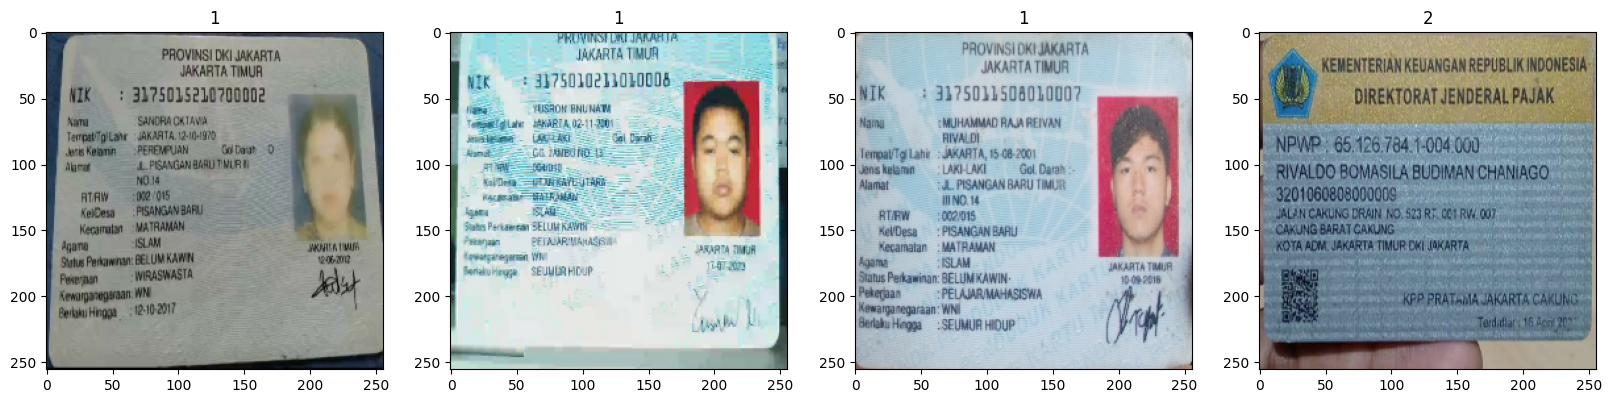

In [7]:
import matplotlib.pyplot as plt

# from this code, we know that 2 = npwp, 0 = kis, 1 = ktp
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>Preprocessing</h1>

In [8]:
scaled_img = data.map(lambda x,y: (x/255, y))

In [9]:
scaled_iterator = scaled_img.as_numpy_iterator()

In [12]:
# IMAGES HAVE BEEN NORMALIZED TO A SCALE OF 0-1
scaled_iterator.next()[0]

array([[[[0.09359293, 0.07398508, 0.06222038],
         [0.09290747, 0.07329963, 0.06153493],
         [0.09019608, 0.07058824, 0.05882353],
         ...,
         [0.05369179, 0.08506434, 0.13604473],
         [0.05372243, 0.08509497, 0.13607536],
         [0.05215604, 0.08352859, 0.13006657]],

        [[0.10196079, 0.08235294, 0.07058824],
         [0.09833027, 0.07872242, 0.06695772],
         [0.09350783, 0.07389999, 0.06213529],
         ...,
         [0.0627451 , 0.08627451, 0.14117648],
         [0.05793505, 0.08872549, 0.13999693],
         [0.05502816, 0.08640071, 0.12953797]],

        [[0.10767464, 0.08806679, 0.07630208],
         [0.10375306, 0.08414522, 0.07238051],
         [0.09983149, 0.08022365, 0.06845894],
         ...,
         [0.06883725, 0.08591685, 0.14357084],
         [0.06335784, 0.08688726, 0.14178921],
         [0.05882353, 0.09019608, 0.13333334]],

        ...,

        [[0.6149092 , 0.45020327, 0.3953013 ],
         [0.6160233 , 0.4513174 , 0.39641544]

<h1>Split Dataset</h1>

In [13]:
len(data)

10

In [14]:
train_size  = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [18]:
len(test)

1

<h1>Augmentation Layer</h1>

In [23]:
from tensorflow.keras.models import Sequential

augmentation_layers = Sequential([
    tf.keras.layers.RandomContrast(0.5, input_shape=(256,256,3)),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomBrightness(0.3)
])

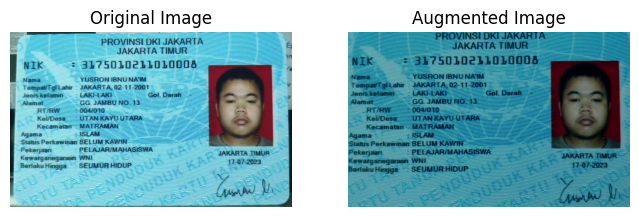

In [22]:
# TESTING THE AUGMENTATION LAYER WHETHER ITS WORKING OR NOT

from PIL import Image

img = Image.open('images\ktp\\2023-11-29-13-41-21-337_exported_0.jpg')
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

# Apply the augmentation
augmented_image = augmentation_layers(img_array, training=True)

# Convert the augmented image back to a PIL image for visualization
augmented_image = tf.squeeze(augmented_image, axis=0)  # Remove the batch dimension
augmented_image = Image.fromarray(np.uint8(augmented_image))

# Plot the original and augmented images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_image)
plt.axis('off')

plt.show()

<h1>Build the Model</h1>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [26]:
# LOAD THE RESNET50 PRETRAINED MODEL TO DO TRANSFER LEARNING
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(256,256,3),
                                                  pooling='avg',
                                                  classes=3,
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

In [27]:
# Create the combined model
resnet_model = Sequential([
    augmentation_layers,
    pretrained_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [28]:
resnet_model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [29]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,113,027
Trainable params: 525,315
Non-trainable params: 23,587,712
_________________________________________________________________


<h1>Model Training</h1>

In [62]:
!mkdir logdir

In [30]:
log_dir = 'logdir'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [31]:
hist = resnet_model.fit(train, epochs=200, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/200
7/7 [==============================] - 15s 369ms/step - loss: 0.3978 - accuracy: 0.8214 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2/200
7/7 [==============================] - 2s 248ms/step - loss: 0.0508 - accuracy: 0.9732 - val_loss: 7.1980e-04 - val_accuracy: 1.0000
Epoch 3/200
7/7 [==============================] - 2s 244ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 2.5684e-04 - val_accuracy: 1.0000
Epoch 4/200
7/7 [==============================] - 2s 244ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.5094e-04 - val_accuracy: 1.0000
Epoch 5/200
7/7 [==============================] - 2s 249ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2181e-04 - val_accuracy: 1.0000
Epoch 6/200
7/7 [==============================] - 2s 245ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 4.6282e-05 - val_accuracy: 1.0000
Epoch 7/200
7/7 [==============================] - 2s 243ms/step - loss: 0.0183 - accuracy: 0.9911 - val_loss: 3.2003e-05 - val_accur

<h1>Plot Performance</h1>

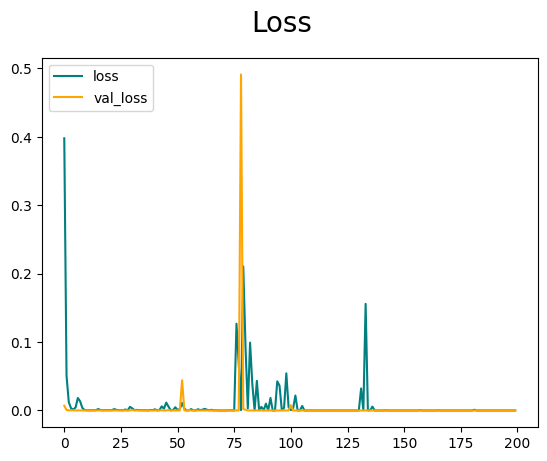

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

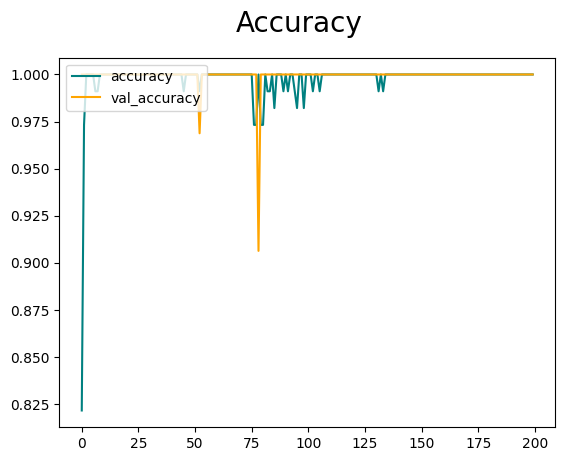

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

<h1>Model Evaluation</h1>

In [35]:
loss, accuracy = resnet_model.evaluate(test)
print(f'model accuracy : {accuracy}')
print(f'model loss : {loss}')

1/1 [==============================] - 1s 656ms/step - loss: 0.0000e+00 - accuracy: 1.0000
model accuracy : 1.0
model loss : 0.0


In [36]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical

pre = Precision()
re = Recall()

In [188]:
batch = test.as_numpy_iterator()

X, y = batch.next()

In [189]:
# 2 = npwp, 0 = kis, 1 = ktp
y

array([1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2])

In [209]:
X.shape

(16, 256, 256, 3)

In [190]:
yhat = resnet_model.predict(X)

1/1 [==============================] - 0s 35ms/step


In [191]:
yhat

array([[1.8407382e-26, 1.0000000e+00, 1.6296073e-29],
       [1.0000000e+00, 6.5437187e-15, 3.7369058e-12],
       [1.0000000e+00, 3.9759655e-16, 6.2352233e-17],
       [3.5143194e-18, 3.9805638e-16, 1.0000000e+00],
       [4.3213355e-10, 1.2479931e-11, 1.0000000e+00],
       [7.6575501e-19, 1.0000000e+00, 6.5513906e-14],
       [1.0000000e+00, 6.1219582e-15, 6.8666594e-15],
       [1.0000000e+00, 2.8454471e-13, 5.6818463e-11],
       [1.0000000e+00, 2.3807713e-14, 1.6115588e-14],
       [1.0000000e+00, 3.2330839e-20, 8.0782845e-16],
       [4.9075375e-12, 2.8188604e-12, 1.0000000e+00],
       [1.0000000e+00, 2.6080562e-18, 1.4624430e-14],
       [9.6915538e-24, 1.0000000e+00, 2.6135159e-24],
       [2.2513847e-13, 8.3184619e-14, 1.0000000e+00],
       [1.0000000e+00, 3.7118649e-16, 1.5598701e-12],
       [1.0861561e-12, 7.3617058e-16, 1.0000000e+00]], dtype=float32)

In [192]:
y_pred_test = []

for prediction in yhat:
    predicted = np.argmax(prediction)
    y_pred_test.append(predicted)

In [193]:
print(f'actual labels = {y}')
print(f'predicted labels = {y_pred_test}')

actual labels = [1 0 0 2 2 1 0 0 0 0 2 0 1 2 0 2]
predicted labels = [1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2]


In [55]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_one_hot = to_categorical(y, num_classes=3)
    yhat = resnet_model.predict(X)
    pre.update_state(y_one_hot, yhat)
    re.update_state(y_one_hot, yhat)

1/1 [==============================] - 0s 36ms/step


In [56]:
print(f'Precision Score : {pre.result().numpy()}')
print(f'Recall Score : {re.result().numpy()}')

Precision Score : 1.0
Recall Score : 1.0


<h1>Performance Testing</h1>

In [119]:
from PIL import Image

In [182]:
img = Image.open('images\\npwp\IMG_20231130_153410_156~4.jpg')
img = np.array(img)
img.shape

(331, 504, 3)

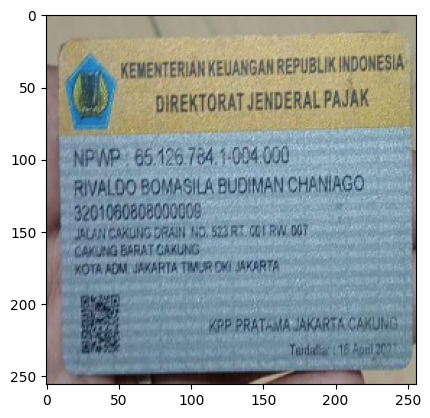

In [183]:
resized_img = tf.image.resize(img, (256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [201]:
resized_img = resized_img/255

In [203]:
input_image = np.expand_dims(resized_img, axis=0)

In [210]:
input_image[0].shape

(256, 256, 3)

In [205]:
yhat = resnet_model.predict(input_image)

1/1 [==============================] - 0s 24ms/step


In [211]:
# PREVIOUS : array([[9.9999952e-01, 8.7485857e-10, 4.5954212e-07]], dtype=float32)
yhat[0]

array([9.9999928e-01, 1.1166178e-09, 7.5282816e-07], dtype=float32)

In [212]:
prediction_index = np.argmax(yhat[0])
prediction_index

0

<h1>Save Model</h1>

In [2]:
from tensorflow.keras.models import load_model

In [122]:
resnet_model.save(os.path.join('models','card_classifier.h5'))

In [3]:
resnet_model = load_model('models\card_classifier.h5')

In [5]:
from PIL import Image
import numpy as np
import tensorflow as tf

img = Image.open('tes_kis.jpg')  # Corrected path
img = np.array(img)

# Convert the NumPy array to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

# Resize the image using TensorFlow function
resized_img = tf.image.resize(img_tensor, (256, 256))

# Expand dimensions if needed
input_image = tf.expand_dims(resized_img, axis=0)

# Assuming 'resnet_model' is your pre-trained ResNet model
yhat = resnet_model.predict(input_image)

labels = {0 : 'kis',
          1 : 'ktp',
          2 : 'npwp'}

prediction_index = np.argmax(yhat)
print("Predicted Class Index:", labels[prediction_index])


1/1 [==============================] - 0s 60ms/step
Predicted Class Index: kis


In [156]:
unseen_img_pred = resnet_model.predict(input_image)
unseen_img_pred

1/1 [==============================] - 0s 26ms/step


array([[9.9999976e-01, 4.1542811e-10, 1.8438601e-07]], dtype=float32)

In [161]:
prediction_index = np.argmax(unseen_img_pred[0])
prediction_index

0

In [160]:
array_tes = np.array([[6, 4,7]])
max_index = np.argmax(array_tes[0])
max_index

2